<a href="https://colab.research.google.com/github/Manojpatil123/self-project/blob/main/Self_Project_Text_Clustering_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective : This task requires you to build text clusters and report whether these clusters make sense. </b></u>

* ###  For this clustering project on text, you will use a dataset named 20newsgroup. This is available in sklearn.datasets. You can use the code given below in the code cells to fetch the data.

* ### Next you need to run a TFIDFVectorizer on the sentences to obtain a document-word sparse matrix. Use this array as your $X$.

* ### Once you have got your array, you can apply different clustering techniques such as K-Means clustering and Hierarchical clustering to obtain meaningful clusters. Check if these clusters seem relevant and well separated. 

* ### Finally you can use dimensionality reduction technqiues such as PCA or t-SNE(you can read about it and use it straight away) to come up with two dimensional visualization of these clusters. 







### In your <b>Capstone project</b>, you will perform clustering on documents to find relevant themes/topics. We call this Topic Modeling. There are different algorithms for building a topic model such as Latent Dirichlet Allocation (LDA), NMF etc. For now you are only expected to use the clustering algorithms discussed so far.

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
dataset = fetch_20newsgroups(download_if_missing=True)

In [ ]:
news_list = dataset.data

In [ ]:
news_list[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
len(news_list)

11314

In [ ]:
# let's choose a subset of the given dataset so our machine doesn't crash
news_list = news_list[-500:]

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")
tokenizer.fit_on_texts(news_list)

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words

news_list = normalize(news_list)
print(news_list)

['from tclockorionoacuciedu tim clock\nsubject re conventional proposales israel  palestinians\nnntppostinghost orionoacuciedu\norganization university of california irvine\nlines 117\n\nin article 2bca3dc013224newsserviceuciedu tclockorionoacuciedu tim clock writes\n\nthe latest israeli proposal first proposed in february of 1992 contains \nthe following assumptions concerning the nature of any interim status refering to the wb and gaza the palestinians implemented by negotiations it\nstates that    \n   israel will remain the existing source of authority until final status\n    is agreed upon\n   israel will negiotiate the delegation of power to the organs of the \n    interim selfgovernment arrangements isga\n   the isga will apply to the palestinian inhabitants of the territories\n    under israeli military administration the arrangements will not have a \n    territorial application nor will they apply to the israeli population \n    of the territories or to the palestinian inhabi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words= 'english')

X = vectorizer.fit_transform(news_list)

In [ ]:
X.shape
# we have 19753 unique words

(500, 19753)

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
# convert X into array form for clustering
X = X.toarray()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
kmeans = KMeans( init="k-means++", n_clusters=8, max_iter=300,   random_state=0)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf76aa4250>,
                 k=None, metric=None, model=None, timings=False)

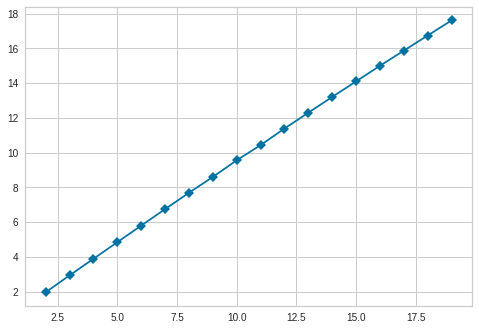

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric= 'distortion', timings= False, locate_elbow= False)
visualizer.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf6e19b3d0>,
                 k=None, metric=None, model=None, timings=False)

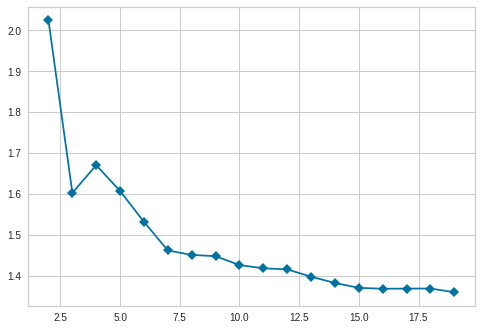

In [ ]:
# trying Calinski Harabaz as metric
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='calinski_harabaz', timings=False, locate_elbow=True)
visualizer.fit(X)

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf6dcd6310>,
                 k=None, metric=None, model=None, timings=False)

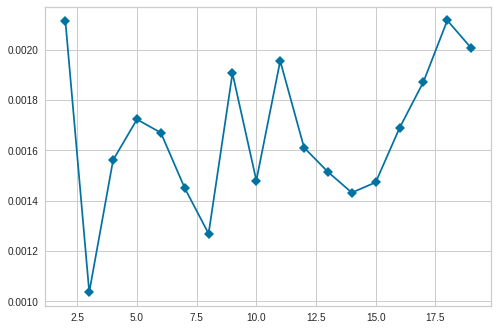

In [ ]:
# trying Silhoutte Score
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X)

In [ ]:
# looks like we can go with 8 clusters.

kmeans= KMeans(n_clusters=8, init= 'k-means++',max_iter=300, n_init=1)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#predict the labels of clusters.
labels = kmeans.fit_predict(X)

In [ ]:
# test a new text

X_new= vectorizer.transform([news_list[0]])

y_pred_new= kmeans.predict(X_new)[0]

y_pred_new

7

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# silhouette score of my clusters
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient: 0.001


Let's try hirarchical clustering now

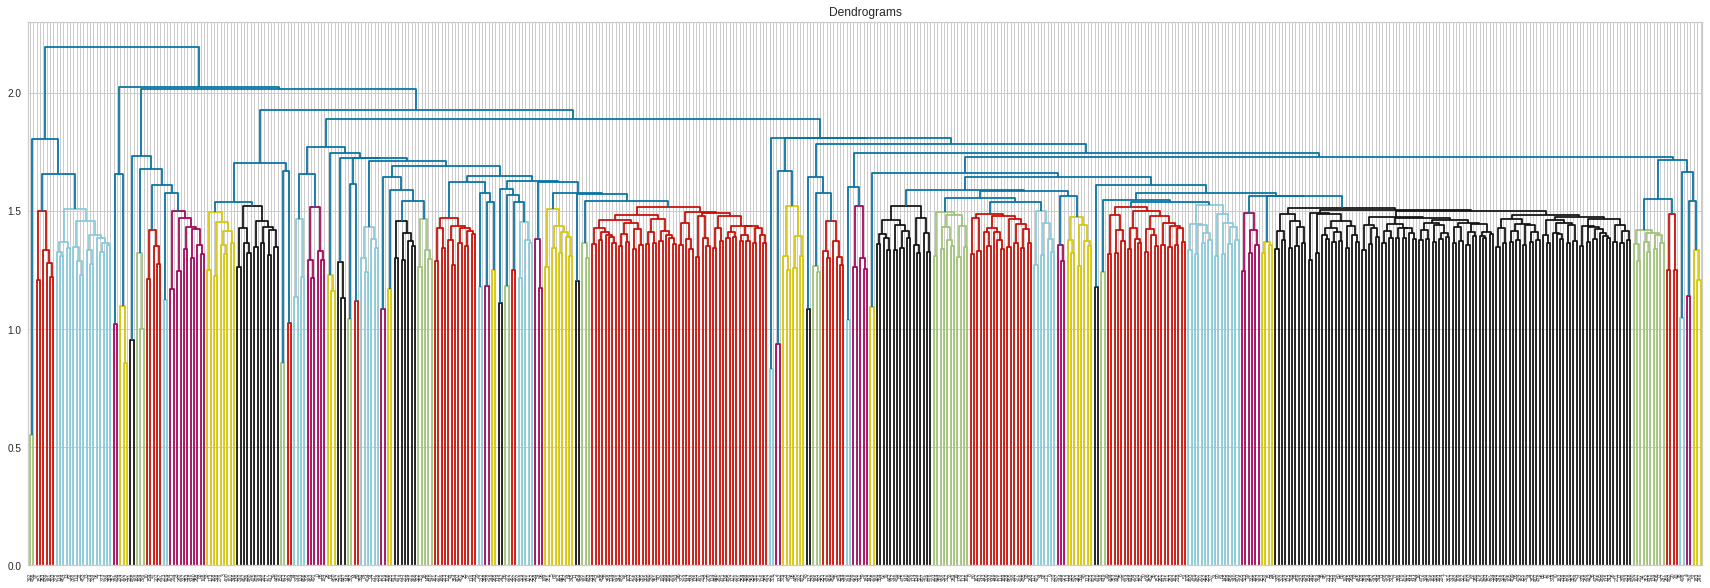

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

plt.axhline(y=180)

Let's go with four clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
aggh.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
y_hc=aggh.fit_predict(X)


In [ ]:
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, aggh.labels_, sample_size=1000))

Silhouette Coefficient: 0.001


Performing PCA 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# function to understand the variance for different n_components
def pca_variance(n_components):
  pca= PCA(n_components= n_components)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

In [ ]:
pca_variance(100)

0.29064635700163965


In [ ]:
pca_variance(400)

0.8778579992257868


In [ ]:
# 400 components look good with 87% variance
pca = PCA(n_components=400)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'No. of components VS Explained variance')

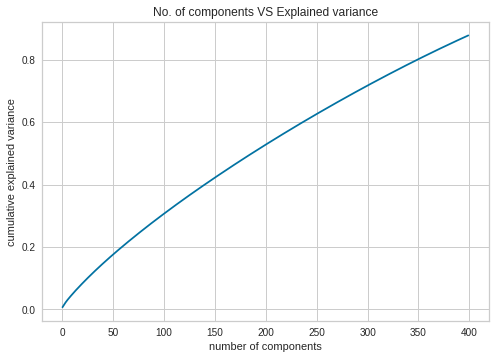

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance')

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(500, 400)

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=7, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_pca, kmeans.labels_))

Silhouette Coefficient:  -0.024


In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X_pca)

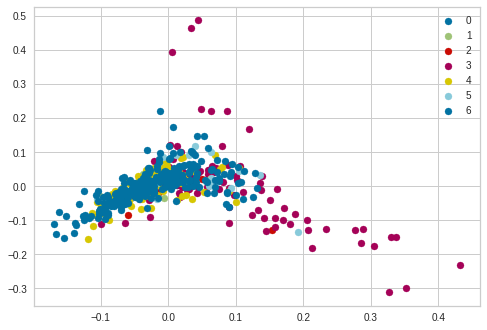

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
plt.legend()
plt.show()